In [1]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import urllib3.request, json
import os
import numpy as np
import tensorflow
import tensorflow as tf # This code has been tested with TensorFlow 1.6
from sklearn.preprocessing import MinMaxScaler

/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
data_source = 'kaggle' # alphavantage or kaggle

if data_source == 'alphavantage':
    # ====================== Loading Data from Alpha Vantage ==================================

    api_key = '<your API key>'

    # American Airlines stock market prices
    ticker = "AAL"

    # JSON file with all the stock market data for AAL from the last 20 years
    url_string = "https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=%s&outputsize=full&apikey=%s"%(ticker,api_key)

    # Save data to this file
    file_to_save = 'stock_market_data-%s.csv'%ticker

    # If you haven't already saved data,
    # Go ahead and grab the data from the url
    # And store date, low, high, volume, close, open values to a Pandas DataFrame
    if not os.path.exists(file_to_save):
        with urllib.request.urlopen(url_string) as url:
            data = json.loads(url.read().decode())
            # extract stock market data
            data = data['Time Series (Daily)']
            df = pd.DataFrame(columns=['Date','Low','High','Close','Open'])
            for k,v in data.items():
                date = dt.datetime.strptime(k, '%Y-%m-%d')
                data_row = [date.date(),float(v['3. low']),float(v['2. high']),
                            float(v['4. close']),float(v['1. open'])]
                df.loc[-1,:] = data_row
                df.index = df.index + 1
        print('Data saved to : %s'%file_to_save)        
        df.to_csv(file_to_save)

    # If the data is already there, just load it from the CSV
    else:
        print('File already exists. Loading data from CSV')
        df = pd.read_csv(file_to_save)

else:

    # ====================== Loading Data from Kaggle ==================================
    # You will be using HP's data. Feel free to experiment with other data.
    # But while doing so, be careful to have a large enough dataset and also pay attention to the data normalization
    df = pd.read_csv('/Users/blaze/OneDrive/Work/Time Series/Shell Stocks/RDS-A.csv',delimiter=',',usecols=['Date','Open','High','Low','Close'])
    print('Loaded data from the Kaggle repository')

Loaded data from the Kaggle repository


In [74]:
df

,Date,Open,High,Low,Close
0,2005-07-21,61.439999,61.470001,60.790001,61.400002
1,2005-07-22,60.799999,61.200001,60.790001,61.200001
2,2005-07-25,61.419998,61.580002,60.880001,61.110001
3,2005-07-26,60.889999,61.060001,60.540001,60.990002
4,2005-07-27,60.630001,60.740002,60.160000,60.669998
5,2005-07-28,59.650002,60.480000,59.500000,60.330002
6,2005-07-29,61.849998,61.970001,61.250000,61.279999
7,2005-08-01,62.799999,63.549999,62.619999,63.029999
8,2005-08-02,63.820000,63.830002,63.340000,63.520000
9,2005-08-03,64.070000,64.150002,63.459999,63.990002


In [75]:
# Sort DataFrame by date
df = df.sort_values('Date')
# Double check the result
df.head()

,Date,Open,High,Low,Close
0,2005-07-21,61.439999,61.470001,60.790001,61.400002
1,2005-07-22,60.799999,61.200001,60.790001,61.200001
2,2005-07-25,61.419998,61.580002,60.880001,61.110001
3,2005-07-26,60.889999,61.060001,60.540001,60.990002
4,2005-07-27,60.630001,60.740002,60.160000,60.669998


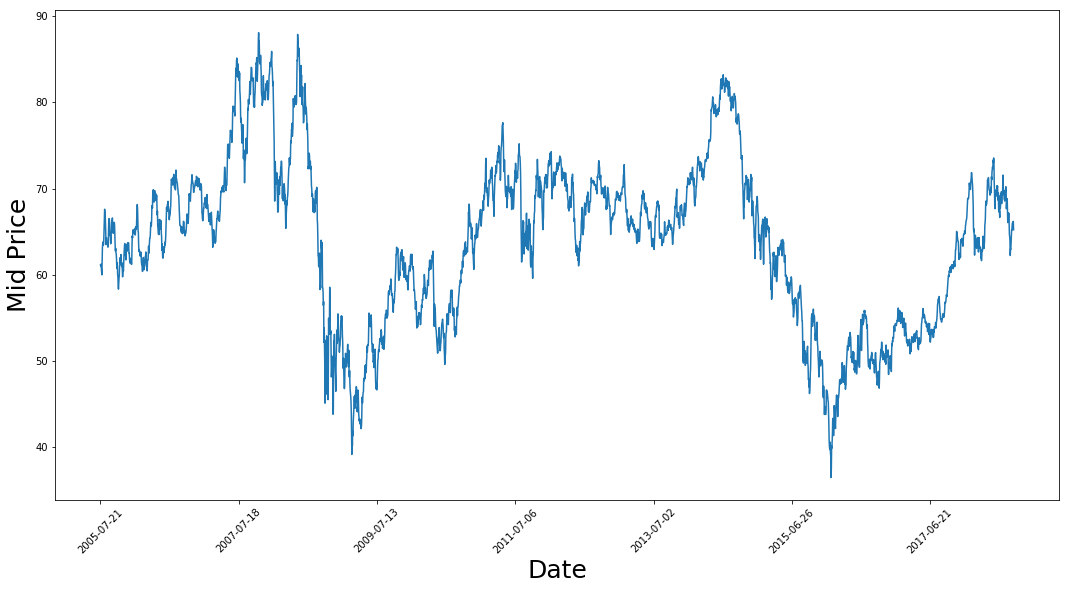

In [76]:
plt.figure(figsize = (18,9))
plt.plot(range(df.shape[0]),(df['Low']+df['High'])/2.0)
plt.xticks(range(0,df.shape[0],500),df['Date'].loc[::500],rotation=45)
plt.xlabel('Date',fontsize=25)
plt.ylabel('Mid Price',fontsize=25)
plt.show()

In [194]:
# Let's introduce the mid_price as the stock price indicator each day
high_prices = df.loc[:,'High'].as_matrix()
low_prices = df.loc[:,'Low'].as_matrix()
mid_prices = (high_prices+low_prices)/2.0 # Just to make sure no unexpectation will happen

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [195]:
mid_prices

array([61.130001 , 60.995001 , 61.2300015, ..., 66.0150035, 66.1900025,
       65.2150005])

In [196]:
# Then, we can split the data into training set and test set
train_data = mid_prices[:int(0.8*len(mid_prices))]
test_data = mid_prices[int(0.8*len(mid_prices)):]

In [197]:
# Scale the data to be between 0 and 1
# When scaling remember! You normalize both test and train data with respect to training data
# Because you are not supposed to have access to test data
scaler = MinMaxScaler()
train_data = train_data.reshape(-1,1)
test_data = test_data.reshape(-1,1)

In [198]:
# Train the Scaler with training data and smooth data
smoothing_window_size = 100
for di in range(0,len(train_data)-smoothing_window_size,smoothing_window_size):
    #print(train_data[di:di+smoothing_window_size,:])
    scaler.fit(train_data[di:di+smoothing_window_size,:])
    train_data[di:di+smoothing_window_size,:] = scaler.transform(train_data[di:di+smoothing_window_size,:])
    
    

In [200]:
# You normalize the last bit of remaining data
scaler.fit(train_data[di+smoothing_window_size:,:])
train_data[di+smoothing_window_size:,:] = scaler.transform(train_data[di+smoothing_window_size:,:])

In [201]:
# Reshape both train and test data
train_data = train_data.reshape(-1)

# Normalize test data
test_data = scaler.transform(test_data).reshape(-1)

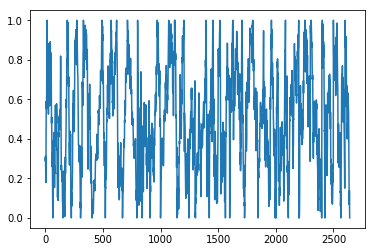

In [202]:
plt.plot(train_data)

Now, we can try to perform the same exponetial moving average processing as we did with R, to improve the ragged condition of the data.

In [203]:
# Now perform exponential moving average smoothing
# So the data will have a smoother curve than the original ragged data
EMA = 0.0
gamma = 0.1
for ti in range(len(train_data)):
  EMA = gamma*train_data[ti] + (1-gamma)*EMA
  train_data[ti] = EMA

# Used for visualization and test purposes
all_mid_data = np.concatenate([train_data,test_data],axis=0)

Averaging mechanisms allow you to predict (often one time step ahead) by representing the future stock price as an average of the previously observed stock prices. Doing this for more than one time step can produce quite bad results. You will look at two averaging techniques below; standard averaging and exponential moving average. You will evaluate both qualitatively (visual inspection) and quantitatively (Mean Squared Error) the results produced by the two algorithms.
The Mean Squared Error (MSE) can be calculated by taking the Squared Error between the true value at one step ahead and the predicted value and averaging it over all the predictions.
Standard Average

You can understand the difficulty of this problem by first trying to model this as an average calculation problem. First you will try to predict the future stock market prices (for example, xt+1) as an average of the previously observed stock market prices within a fixed size window (for example, xt-N, ..., xt) (say previous 100 days). Thereafter you will try a bit more fancier "exponential moving average" method and see how well that does. Then you will move on to the "holy-grail" of time-series prediction; Long Short-Term Memory models.
First you will see how normal averaging works. That is you say,

In other words, you say the prediction at t+1
 is the average value of all the stock prices you observed within a window of t
 to t−N
.

In [205]:
window_size = 10
N = train_data.size
std_avg_predictions = []
std_avg_x = []
mse_errors = []

for pred_idx in range(window_size,N):

    if pred_idx >= N:
        date = dt.datetime.strptime(k, '%Y-%m-%d').date() + dt.timedelta(days=1)
    else:
        date = df.loc[pred_idx,'Date']

    std_avg_predictions.append(np.mean(train_data[pred_idx-window_size:pred_idx]))
    mse_errors.append((std_avg_predictions[-1]-train_data[pred_idx])**2)
    std_avg_x.append(date)

print('MSE error for standard averaging: %.5f'%(0.5*np.mean(mse_errors)))

MSE error for standard averaging: 0.00349


Now let's compare the true values and the predictions:

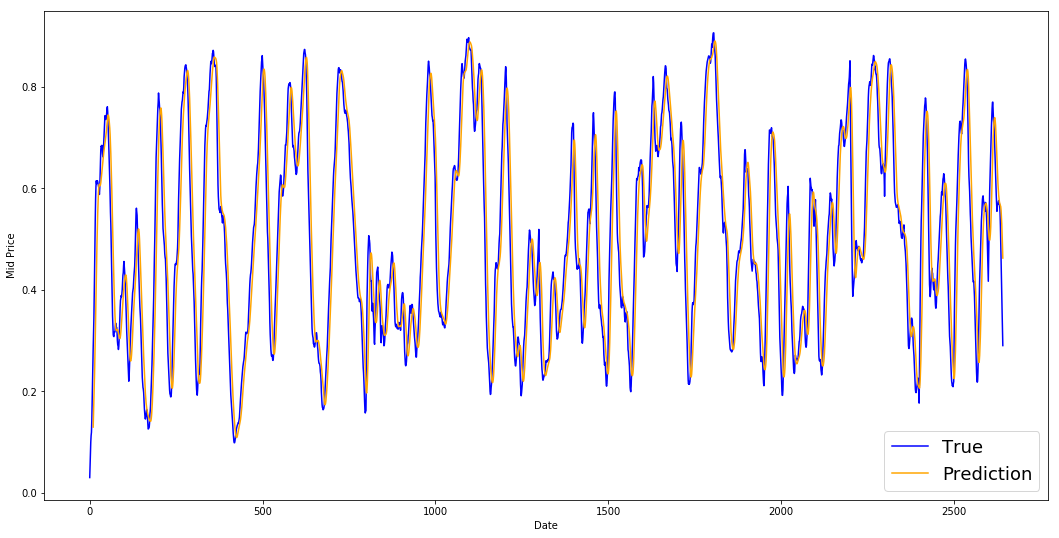

In [206]:
plt.figure(figsize = (18,9))
plt.plot(range(train_data.shape[0]),train_data,color='b',label='True')
plt.plot(range(window_size,N),std_avg_predictions,color='orange',label='Prediction')
#plt.xticks(range(0,df.shape[0],50),df['Date'].loc[::50],rotation=45)
plt.xlabel('Date')
plt.ylabel('Mid Price')
plt.legend(fontsize=18)
plt.show()

It seems that it is not too bad of a model for very short predictions (one day ahead). Given that stock prices don't change from 0 to 100 overnight, this behavior is sensible. Next, let's check what the exponential moving average can do for us. 

## Exponential Moving Average

In the exponential moving average method, we can calculate xt+1
 as,
xt+1 = EMAt = γ × EMAt-1 + (1-γ) xt where EMA0 = 0 and EMA is the exponential moving average value you maintain over time.
The above equation basically calculates the exponential moving average from t+1
 time step and uses that as the one step ahead prediction. γ
 decides what the contribution of the most recent prediction is to the EMA. For example, a γ=0.1
 gets only 10% of the current value into the EMA. Because you take only a very small fraction of the most recent, it allows to preserve much older values you saw very early in the average. See how good this looks when used to predict one-step ahead below.

In [208]:
window_size = 100
N = train_data.size

run_avg_predictions = []
run_avg_x = []

mse_errors = []

running_mean = 0.0
run_avg_predictions.append(running_mean)

decay = 0.5

for pred_idx in range(1,N):

    running_mean = running_mean*decay + (1.0-decay)*train_data[pred_idx-1]
    run_avg_predictions.append(running_mean)
    mse_errors.append((run_avg_predictions[-1]-train_data[pred_idx])**2)
    run_avg_x.append(date)

print('MSE error for EMA averaging: %.5f'%(0.5*np.mean(mse_errors)))

MSE error for EMA averaging: 0.00057


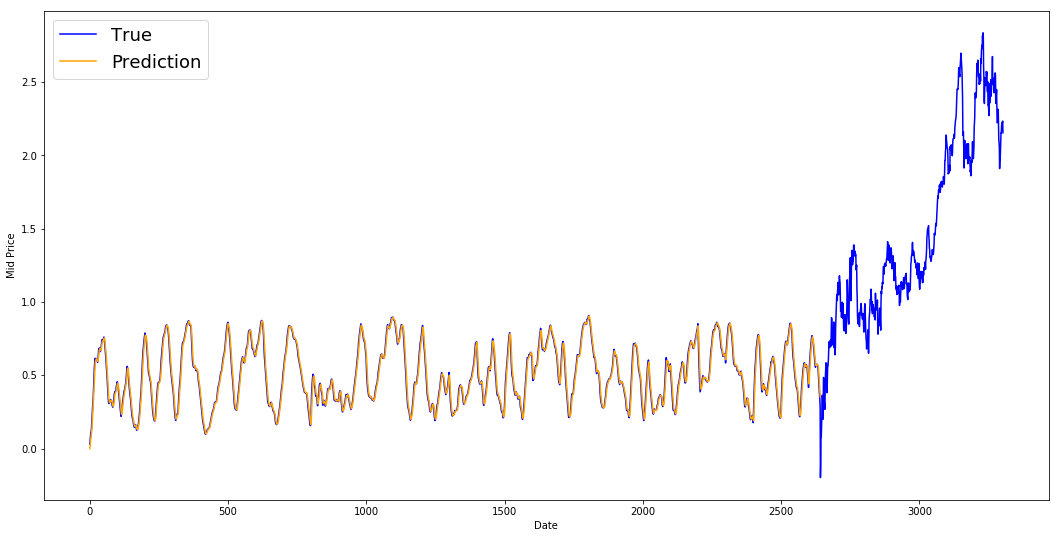

In [209]:
# Let's visualize the comparison between the prediction and the original data
plt.figure(figsize = (18,9))
plt.plot(range(df.shape[0]),all_mid_data,color='b',label='True')
plt.plot(range(0,N),run_avg_predictions,color='orange', label='Prediction')
#plt.xticks(range(0,df.shape[0],50),df['Date'].loc[::50],rotation=45)
plt.xlabel('Date')
plt.ylabel('Mid Price')
plt.legend(fontsize=18)
plt.show()

You see that it fits a perfect line that follows the True distribution (and justified by the very low MSE). Practically speaking, we can't do much with just the stock market value of the next day. Personally what I'd like is not the exact stock market price for the next day, but would the stock market prices go up or down in the next 30 days. Try to do this, and we will expose the incapability of the EMA method:

### Predict More Than One Step into the Future

To make things concrete, let's assume values, say xt=0.4
, EMA=0.5
 and γ=0.5
Say you get the output with the following equation
Xt+1 = EMAt = γ × EMAt-1 + (1 - γ)Xt
So you have xt+1=0.5×0.5+(1−0.5)×0.4=0.45
So xt+1=EMAt=0.45
So the next prediction xt+2
 becomes,
Xt+2 = γ × EMAt + (1-γ)Xt+1
Which is xt+2=γ×EMAt+(1−γ)EMAt=EMAt
Or in this example, Xt+2 = Xt+1 = 0.45
So no matter how many steps you predict in to the future, you'll keep getting the same answer for all the future prediction steps.

In [145]:
train_data

array([[0.06113   ],
       [0.226046  ],
       [0.52300831],
       ...,
       [0.41417974],
       [0.37754521],
       [0.33979069]])

# Introduction to LSTMs: Making Stock Movement Predictions Far into the Future

Long Short-Term Memory models are extremely powerful time-series models. They can predict an arbitrary number of steps into the future. An LSTM module (or cell) has 5 essential components which allows it to model both long-term and short-term data.

Cell state (ct
) - This represents the internal memory of the cell which stores both short term memory and long-term memories

Hidden state (ht
) - This is output state information calculated w.r.t. current input, previous hidden state and current cell input which you eventually use to predict the future stock market prices. Additionally, the hidden state can decide to only retrive the short or long-term or both types of memory stored in the cell state to make the next prediction.

Input gate (it
) - Decides how much information from current input flows to the cell state

Forget gate (ft
) - Decides how much information from the current input and the previous cell state flows into the current cell state

Output gate (ot
) - Decides how much information from the current cell state flows into the hidden state, so that if needed LSTM can only pick the long-term memories or short-term memories and long-term memories
A cell is pictured below.


## Data Generator

You are first going to implement a data generator to train your model. This data generator will have a method called .unroll_batches(...) which will output a set of num_unrollings batches of input data obtained sequentially, where a batch of data is of size [batch_size, 1]. Then each batch of input data will have a corresponding output batch of data.
For example if num_unrollings=3 and batch_size=4 a set of unrolled batches it might look like,
input data: [x0,x10,x20,x30],[x1,x11,x21,x31],[x2,x12,x22,x32]
output data: [x1,x11,x21,x31],[x2,x12,x22,x32],[x3,x13,x23,x33]

## Data Augmentation

Also to make your model robust you will not make the output for $xtalways
x{t+1}.Ratheryouwillrandomlysampleanoutputfromtheset
x{t+1},x{t+2},\ldots,x_{t+N}where
N$ is a small window size.
Here you are making the following assumption:
$x{t+1},x{t+2},\ldots,x_{t+N}$ will not be very far from each other
I personally think this is a reasonable assumption for stock movement predictions.
Below you illustrate how a batch of data is created visually.


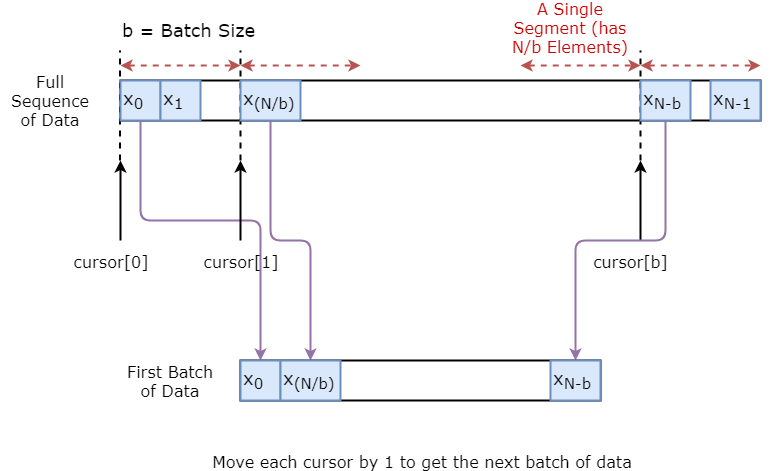

In [213]:
from IPython.display import Image
Image(filename='/Users/blaze/Pictures/batch_pno02e.png')

In [215]:
class DataGeneratorSeq(object):

    def __init__(self,prices,batch_size,num_unroll):
        self._prices = prices
        self._prices_length = len(self._prices) - num_unroll
        self._batch_size = batch_size
        self._num_unroll = num_unroll
        self._segments = self._prices_length //self._batch_size
        self._cursor = [offset * self._segments for offset in range(self._batch_size)]

    def next_batch(self):

        batch_data = np.zeros((self._batch_size),dtype=np.float32)
        batch_labels = np.zeros((self._batch_size),dtype=np.float32)

        for b in range(self._batch_size):
            if self._cursor[b]+1>=self._prices_length:
                #self._cursor[b] = b * self._segments
                self._cursor[b] = np.random.randint(0,(b+1)*self._segments)

            batch_data[b] = self._prices[self._cursor[b]]
            batch_labels[b]= self._prices[self._cursor[b]+np.random.randint(0,5)]

            self._cursor[b] = (self._cursor[b]+1)%self._prices_length

        return batch_data,batch_labels

    def unroll_batches(self):

        unroll_data,unroll_labels = [],[]
        init_data, init_label = None,None
        for ui in range(self._num_unroll):

            data, labels = self.next_batch()    

            unroll_data.append(data)
            unroll_labels.append(labels)

        return unroll_data, unroll_labels

    def reset_indices(self):
        for b in range(self._batch_size):
            self._cursor[b] = np.random.randint(0,min((b+1)*self._segments,self._prices_length-1))



dg = DataGeneratorSeq(train_data,5,5)
u_data, u_labels = dg.unroll_batches()

for ui,(dat,lbl) in enumerate(zip(u_data,u_labels)):   
    print('\n\nUnrolled index %d'%ui)
    dat_ind = dat
    lbl_ind = lbl
    print('\tInputs: ',dat )
    print('\n\tOutput:',lbl)



Unrolled index 0
('\tInputs: ', array([0.03016729, 0.27206397, 0.64324003, 0.60297877, 0.29920515],
      dtype=float32))
('\n\tOutput:', array([0.03016729, 0.27206397, 0.64324003, 0.61805695, 0.2620799 ],
      dtype=float32))


Unrolled index 1
('\tInputs: ', array([0.05586076, 0.27046838, 0.645023  , 0.61943626, 0.26928464],
      dtype=float32))
('\n\tOutput:', array([0.09997468, 0.27046838, 0.6275831 , 0.62423104, 0.2625775 ],
      dtype=float32))


Unrolled index 2
('\tInputs: ', array([0.08152131, 0.26282367, 0.64376694, 0.61805695, 0.2620799 ],
      dtype=float32))
('\n\tOutput:', array([0.08152131, 0.26105985, 0.61827695, 0.62423104, 0.25688112],
      dtype=float32))


Unrolled index 3
('\tInputs: ', array([0.09997468, 0.26105985, 0.63747483, 0.6171361 , 0.26001552],
      dtype=float32))
('\n\tOutput:', array([0.09997468, 0.27837718, 0.61608857, 0.62423104, 0.24296094],
      dtype=float32))


Unrolled index 4
('\tInputs: ', array([0.11280505, 0.26510623, 0.6275831 , 0.6

## Defining Hyperparameters

In this section, you'll define several hyperparameters. D is the dimensionality of the input. It's straightforward, as you take the previous stock price as the input and predict the next one, which should be 1.

Then you have num_unrollings, this is a hyperparameter related to the backpropagation through time (BPTT) that is used to optimize the LSTM model. This denotes how many continuous time steps you consider for a single optimization step. You can think of this as, instead of optimizing the model by looking at a single time step, you optimize the network by looking at num_unrollings time steps. The larger the better.

Then you have the batch_size. Batch size is how many data samples you consider in a single time step.

Next you define num_nodes which represents the number of hidden neurons in each cell. In this trial, we can see that thre are layers of LSTMs.

In [216]:
D = 1 # Dimensionality of the data. Since your data is 1-D this would be 1
num_unrollings = 50 # Number of time steps you look into the future.
batch_size = 50 # Number of samples in a batch
num_nodes = [200,200,150] # Number of hidden nodes in each layer of the deep LSTM stack we're using
n_layers = len(num_nodes) # number of layers
dropout = 0.2 # dropout amount

tf.reset_default_graph() # This is important in case you run this multiple times

## Defining Inputs and Outputs

Next you define placeholders for training inputs and labels. This is very straightforward as you have a list of input placeholders, where each placeholder contains a single batch of data. And the list has num_unrollings placeholders, that will be used at once for a single optimization step.

In [217]:
# Input data.
train_inputs, train_outputs = [],[]

# You unroll the input over time defining placeholders for each time step
for ui in range(num_unrollings):
    train_inputs.append(tf.placeholder(tf.float32, shape=[batch_size,D],name='train_inputs_%d'%ui))
    train_outputs.append(tf.placeholder(tf.float32, shape=[batch_size,1], name = 'train_outputs_%d'%ui))

## Defining Parameters of the LSTM and Regression layer

You will have a three layers of LSTMs and a linear regression layer, denoted by w and b, that takes the output of the last Long Short-Term Memory cell and output the prediction for the next time step. You can use the MultiRNNCell in TensorFlow to encapsulate the three LSTMCell objects you created. Additionally, you can have the dropout implemented LSTM cells, as they improve performance and reduce overfitting.

In [223]:
lstm_cells = [
    tf.contrib.rnn.LSTMCell(num_units=num_nodes[li],
                            state_is_tuple=True,
                            initializer= tf.contrib.layers.xavier_initializer()
                           )
 for li in range(n_layers)]

drop_lstm_cells = [tf.contrib.rnn.DropoutWrapper(
    lstm, input_keep_prob=1.0,output_keep_prob=1.0-dropout, state_keep_prob=1.0-dropout
) for lstm in lstm_cells]
drop_multi_cell = tf.contrib.rnn.MultiRNNCell(drop_lstm_cells)
multi_cell = tf.contrib.rnn.MultiRNNCell(lstm_cells)

w = tf.get_variable('w',shape=[num_nodes[-1], 1], initializer=tf.contrib.layers.xavier_initializer())
b = tf.get_variable('b',initializer=tf.random_uniform([1],-0.1,0.1))

## Calculating LSTM output and Feeding it to the regression layer to get final prediction

In this section, you first create TensorFlow variables (c and h) that will hold the cell state and the hidden state of the Long Short-Term Memory cell. Then you transform the list of train_inputs to have a shape of [num_unrollings, batch_size, D], this is needed for calculating the outputs with the tf.nn.dynamic_rnn function. You then calculate the LSTM outputs with the tf.nn.dynamic_rnn function and split the output back to a list of num_unrolling tensors. the loss between the predictions and true stock prices.

In [226]:
# Create cell state and hidden state variables to maintain the state of the LSTM
c, h = [],[]
initial_state = []
for li in range(n_layers):
  c.append(tf.Variable(tf.zeros([batch_size, num_nodes[li]]), trainable=False))
  h.append(tf.Variable(tf.zeros([batch_size, num_nodes[li]]), trainable=False))
  initial_state.append(tf.contrib.rnn.LSTMStateTuple(c[li], h[li]))

# Do several tensor transofmations, because the function dynamic_rnn requires the output to be of
# a specific format. Read more at: https://www.tensorflow.org/api_docs/python/tf/nn/dynamic_rnn
all_inputs = tf.concat([tf.expand_dims(t,0) for t in train_inputs],axis=0)

# all_outputs is [seq_length, batch_size, num_nodes]
all_lstm_outputs, state = tf.nn.dynamic_rnn(
    drop_multi_cell, all_inputs, initial_state=tuple(initial_state),
    time_major = True, dtype=tf.float32)

all_lstm_outputs = tf.reshape(all_lstm_outputs, [batch_size*num_unrollings,num_nodes[-1]])

all_outputs = tf.nn.xw_plus_b(all_lstm_outputs,w,b)

split_outputs = tf.split(all_outputs,num_unrollings,axis=0)

## Loss Calculation and Optimizer

Now, you'll calculate the loss. However, you should note that there is a unique characteristic when calculating the loss. For each batch of predictions and true outputs, you calculate the Mean Squared Error. And you sum (not average) all these mean squared losses together. Finally, you define the optimizer you're going to use to optimize the neural network. In this case, you can use Adam, which is a very recent and well-performing optimizer.

In [227]:
# When calculating the loss you need to be careful about the exact form, because you calculate
# loss of all the unrolled steps at the same time
# Therefore, take the mean error or each batch and get the sum of that over all the unrolled steps

print('Defining training Loss')
loss = 0.0
with tf.control_dependencies([tf.assign(c[li], state[li][0]) for li in range(n_layers)]+
                             [tf.assign(h[li], state[li][1]) for li in range(n_layers)]):
  for ui in range(num_unrollings):
    loss += tf.reduce_mean(0.5*(split_outputs[ui]-train_outputs[ui])**2)

print('Learning rate decay operations')
global_step = tf.Variable(0, trainable=False)
inc_gstep = tf.assign(global_step,global_step + 1)
tf_learning_rate = tf.placeholder(shape=None,dtype=tf.float32)
tf_min_learning_rate = tf.placeholder(shape=None,dtype=tf.float32)

learning_rate = tf.maximum(
    tf.train.exponential_decay(tf_learning_rate, global_step, decay_steps=1, decay_rate=0.5, staircase=True),
    tf_min_learning_rate)

# Optimizer.
print('TF Optimization operations')
optimizer = tf.train.AdamOptimizer(learning_rate)
gradients, v = zip(*optimizer.compute_gradients(loss))
gradients, _ = tf.clip_by_global_norm(gradients, 5.0)
optimizer = optimizer.apply_gradients(
    zip(gradients, v))

print('\tAll done')

Defining training Loss
Learning rate decay operations
TF Optimization operations
	All done


## Prediction Related Calculations

Here you define the prediction related TensorFlow operations. First, define a placeholder for feeding in the input (sample_inputs), then similar to the training stage, you define state variables for prediction (sample_c and sample_h). Finally you calculate the prediction with the tf.nn.dynamic_rnn function and then sending the output through the regression layer (w and b). You also should define the reset_sample_state operation, which resets the cell state and the hidden state. You should execute this operation at the start, every time you make a sequence of predictions.


In [249]:
print('Defining prediction related TF functions')

sample_inputs = tf.placeholder(tf.float32, shape=[1,D])

# Maintaining LSTM state for prediction stage
sample_c, sample_h, initial_sample_state = [],[],[]
for li in range(n_layers):
  sample_c.append(tf.Variable(tf.zeros([1, num_nodes[li]]), trainable=False))
  sample_h.append(tf.Variable(tf.zeros([1, num_nodes[li]]), trainable=False))
  initial_sample_state.append(tf.contrib.rnn.LSTMStateTuple(sample_c[li],sample_h[li]))

reset_sample_states = tf.group([tf.assign(sample_c[li],tf.zeros([1, num_nodes[li]])) for li in range(n_layers)],
                               [tf.assign(sample_h[li],tf.zeros([1, num_nodes[li]])) for li in range(n_layers)])

sample_outputs, sample_state = tf.nn.dynamic_rnn(multi_cell, tf.expand_dims(sample_inputs,0),
                                   initial_state=tuple(initial_sample_state),
                                   time_major = True,
                                   dtype=tf.float32)

with tf.control_dependencies([tf.assign(sample_c[li],sample_state[li][0]) for li in range(n_layers)]+
                              [tf.assign(sample_h[li],sample_state[li][1]) for li in range(n_layers)]):  
  sample_prediction = tf.nn.xw_plus_b(tf.reshape(sample_outputs,[1,-1]), w, b)

print('\tAll done')

Defining prediction related TF functions
	All done


Do not add '*' for the tf.group inputs.

## Running the LSTM

Here you will train and predict stock price movements for several epochs and see whether the predictions get better or worse over time. You follow the following procedure.

Define a test set of starting points (test_points_seq) on the time series to evaluate the model on

For each epoch

For full sequence length of training data

Unroll a set of num_unrollings batches

Train the neural network with the unrolled batches

Calculate the average training loss

For each starting point in the test set

Update the LSTM state by iterating through the previous num_unrollings 
data points found before the test point

Make predictions for n_predict_once steps continuously, using the previous prediction as the current input

Calculate the MSE loss between the n_predict_once points predicted and the true stock prices at those time stamps

In [251]:
epochs = 30
valid_summary = 1 # Interval you make test predictions

n_predict_once = 50 # Number of steps you continously predict for

train_seq_length = train_data.size # Full length of the training data

train_mse_ot = [] # Accumulate Train losses
test_mse_ot = [] # Accumulate Test loss
predictions_over_time = [] # Accumulate predictions

session = tf.InteractiveSession()

tf.global_variables_initializer().run()

# Used for decaying learning rate
loss_nondecrease_count = 0
loss_nondecrease_threshold = 2 # If the test error hasn't increased in this many steps, decrease learning rate

print('Initialized')
average_loss = 0

# Define data generator
data_gen = DataGeneratorSeq(train_data,batch_size,num_unrollings)

x_axis_seq = []

# Points you start your test predictions from
test_points_seq = np.arange(2600,3200,5).tolist()

for ep in range(epochs):       

    # ========================= Training =====================================
    for step in range(train_seq_length//batch_size):

        u_data, u_labels = data_gen.unroll_batches()

        feed_dict = {}
        for ui,(dat,lbl) in enumerate(zip(u_data,u_labels)):            
            feed_dict[train_inputs[ui]] = dat.reshape(-1,1)
            feed_dict[train_outputs[ui]] = lbl.reshape(-1,1)

        feed_dict.update({tf_learning_rate: 0.0001, tf_min_learning_rate:0.000001})

        _, l = session.run([optimizer, loss], feed_dict=feed_dict)

        average_loss += l

    # ============================ Validation ==============================
    if (ep+1) % valid_summary == 0:

      average_loss = average_loss/(valid_summary*(train_seq_length//batch_size))

      # The average loss
      if (ep+1)% valid_summary == 0:
        print('Average loss at step %d: %f' % (ep+1, average_loss))

      train_mse_ot.append(average_loss)

      average_loss = 0 # reset loss

      predictions_seq = []

      mse_test_loss_seq = []

      # ===================== Updating State and Making Predicitons ========================
      for w_i in test_points_seq:
        mse_test_loss = 0.0
        our_predictions = []

        if (ep+1)-valid_summary==0:
          # Only calculate x_axis values in the first validation epoch
          x_axis=[]

        # Feed in the recent past behavior of stock prices
        # to make predictions from that point onwards
        for tr_i in range(w_i-num_unrollings+1,w_i-1):
          current_price = all_mid_data[tr_i]
          feed_dict[sample_inputs] = np.array(current_price).reshape(1,1)    
          _ = session.run(sample_prediction,feed_dict=feed_dict)

        feed_dict = {}

        current_price = all_mid_data[w_i-1]

        feed_dict[sample_inputs] = np.array(current_price).reshape(1,1)

        # Make predictions for this many steps
        # Each prediction uses previous prediciton as it's current input
        for pred_i in range(n_predict_once):

          pred = session.run(sample_prediction,feed_dict=feed_dict)

          our_predictions.append(np.asscalar(pred))

          feed_dict[sample_inputs] = np.asarray(pred).reshape(-1,1)

          if (ep+1)-valid_summary==0:
            # Only calculate x_axis values in the first validation epoch
            x_axis.append(w_i+pred_i)

          mse_test_loss += 0.5*(pred-all_mid_data[w_i+pred_i])**2

        session.run(reset_sample_states)

        predictions_seq.append(np.array(our_predictions))

        mse_test_loss /= n_predict_once
        mse_test_loss_seq.append(mse_test_loss)

        if (ep+1)-valid_summary==0:
          x_axis_seq.append(x_axis)

      current_test_mse = np.mean(mse_test_loss_seq)

      # Learning rate decay logic
      if len(test_mse_ot)>0 and current_test_mse > min(test_mse_ot):
          loss_nondecrease_count += 1
      else:
          loss_nondecrease_count = 0

      if loss_nondecrease_count > loss_nondecrease_threshold :
            session.run(inc_gstep)
            loss_nondecrease_count = 0
            print('\tDecreasing learning rate by 0.5')

      test_mse_ot.append(current_test_mse)
      print('\tTest MSE: %.5f'%np.mean(mse_test_loss_seq))
      predictions_over_time.append(predictions_seq)
      print('\tFinished Predictions')

/anaconda2/lib/python2.7/site-packages/tensorflow/python/client/session.py:1645: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Initialized
Average loss at step 1: 6.046999
	Test MSE: 0.87362
	Finished Predictions
Average loss at step 2: 3.365793
	Test MSE: 0.54222
	Finished Predictions
Average loss at step 3: 1.112358
	Test MSE: 0.04884
	Finished Predictions
Average loss at step 4: 0.913583
	Test MSE: 0.10100
	Finished Predictions
Average loss at step 5: 0.702380
	Test MSE: 0.30181
	Finished Predictions
Average loss at step 6: 0.694949
	Decreasing learning rate by 0.5
	Test MSE: 0.19280
	Finished Predictions
Average loss at step 7: 0.605638
	Test MSE: 0.15850
	Finished Predictions
Average loss at step 8: 0.600624
	Test MSE: 0.22509
	Finished Predictions
Average loss at step 9: 0.590545
	Decreasing learning rate by 0.5
	Test MSE: 0.24421
	Finished Predictions
Average loss at step 10: 0.573425
	Test MSE: 0.23040
	Finished Predictions
Average loss at step 11: 0.543660
	Test MSE: 0.22013
	Finished Predictions
Average loss at step 12: 0.526829
	Decreasing learning rate by 0.5
	Test MSE: 0.23471
	Finished Prediction

# Visualizing the Predictions

You can see how the MSE loss is going down with the amount of training. This is good sign that the model is learning something useful. To quantify your findings, you can compare the network's MSE loss to the MSE loss you obtained when doing the standard averaging (0.004). You can see that the LSTM is doing better than the standard averaging. And you know that standard averaging (though not perfect) followed the true stock prices movements reasonably.

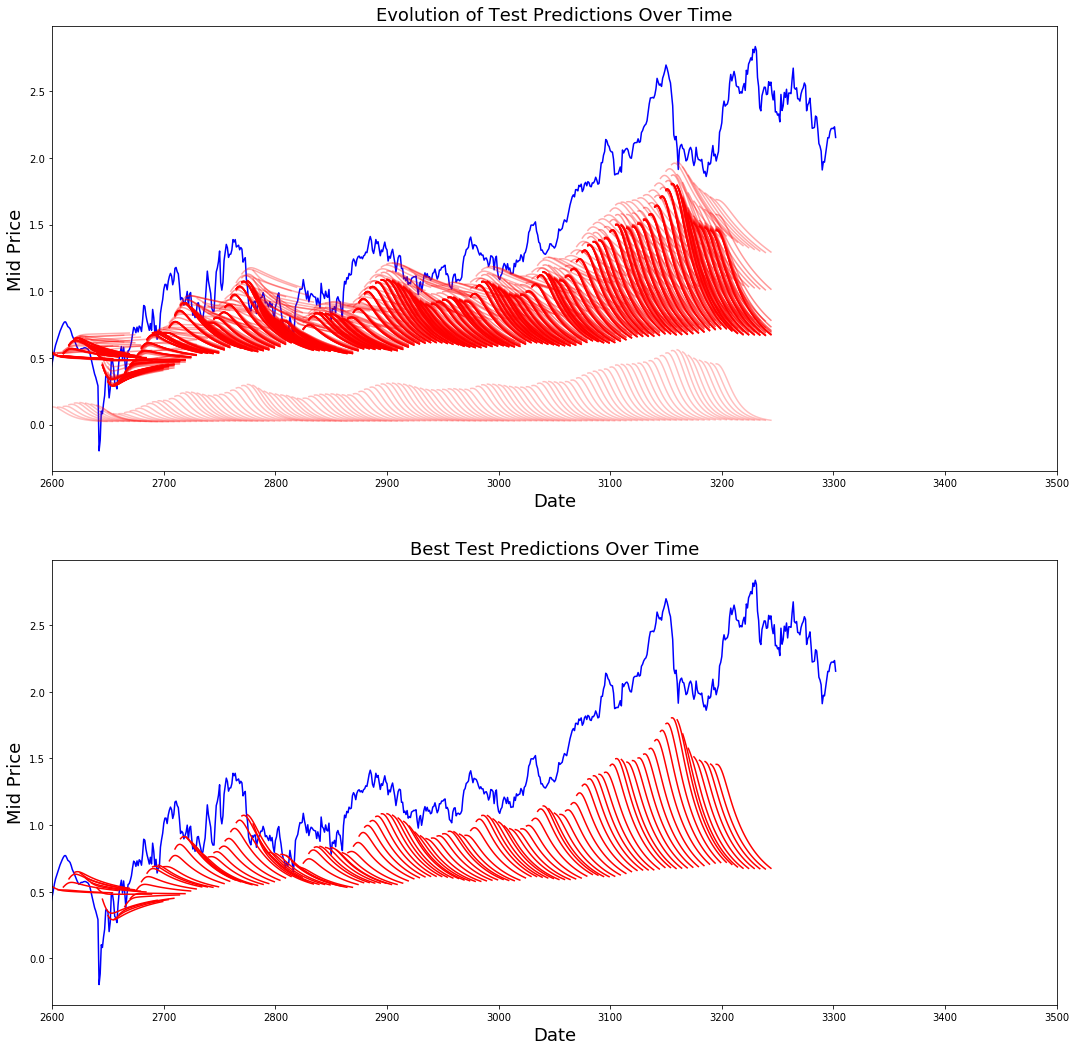

In [253]:
best_prediction_epoch = 23

plt.figure(figsize = (18,18))
plt.subplot(2,1,1)
plt.plot(range(df.shape[0]),all_mid_data,color='b')

# Plotting how the predictions change over time
# Plot older predictions with low alpha and newer predictions with high alpha
start_alpha = 0.25
alpha  = np.arange(start_alpha,1.1,(1.0-start_alpha)/len(predictions_over_time[::3]))
for p_i,p in enumerate(predictions_over_time[::3]):
    for xval,yval in zip(x_axis_seq,p):
        plt.plot(xval,yval,color='r',alpha=alpha[p_i])

plt.title('Evolution of Test Predictions Over Time',fontsize=18)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.xlim(2600,3500)

plt.subplot(2,1,2)

# Predicting the best test prediction you got
plt.plot(range(df.shape[0]),all_mid_data,color='b')
for xval,yval in zip(x_axis_seq,predictions_over_time[best_prediction_epoch]):
    plt.plot(xval,yval,color='r')

plt.title('Best Test Predictions Over Time',fontsize=18)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.xlim(2600,3500)
plt.show()